<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Notebooks/11-Perceptron-I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Perceptrón II
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2024-02
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado como una guía introductoria para implementar un perceptrón con activación sigmoide. Se urilizará una clase de Python para implementar el perceptrón y se probará con un conjunto de datos de ejemplo.



Los paquetes necesarios son:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs

from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='html5')


---
## <font color='264CC7'> Ejemplo 1</font>

Generamos datos de clasificación sintéticos con la función `make_blobs` de la librería `sklearn.datasets`.

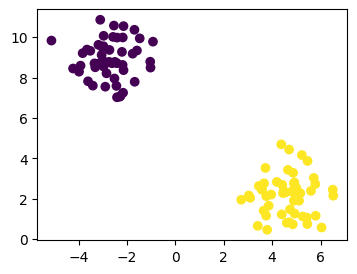

In [2]:
# Generamos los datos
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=42)

# Visualizar los datos
plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Consideremos, primero, que a nuestros datos agregamos una columna de unos para el sesgo. De esta forma, el vector de pesos $w$ incluirá el sesgo $b$. Así, en lugar de calcular $a = w \cdot x + b$, calcularemos $a = w \cdot x$.

Con esto, podemos definir las siguientes funciones:
- Función de combinación: $a(w,x) = wx$
- Función de activación: $\sigma(a) = \dfrac{1}{1+e^{-a}}$
- Salida del perceptrón: $\hat{y} = \sigma(a)$
- Función de costo: $\displaystyle L(\hat{y}, y) = \text{BCE}(\hat{y}, y) = -\frac{1}{N} \left( y \log(\hat{y}) + (1-y) \log(1-\hat{y}) \right)$

Calculamos el gradiente de la función de costo respecto a los pesos $w$:
$$
    \frac{\partial L}{\partial w} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial a} \frac{\partial a}{\partial w}.
$$
El valor de cada derivada parcial es:
$$\begin{aligned}
    \frac{\partial a}{\partial w} &= x,\\
    \frac{\partial \sigma}{\partial a} &= \frac{e^{-a}}{(1+e^{-a})^2} = \sigma(a)(1-\sigma(a)),\\
    \frac{\partial L}{\partial \sigma} &= \frac{1}{N} \left( \frac{\hat{y} - y}{\hat{y}(1-\hat{y})} \right).
\end{aligned}$$
Por lo tanto, el gradiente de la función de costo respecto a los pesos $w$ es:
$$\begin{aligned}
    \frac{\partial L}{\partial w} &= \frac{1}{N} \left( \frac{\hat{y} - y}{\hat{y}(1-\hat{y})} \right) \hat{y}(1-\hat{y}) x\\
    &= \frac{1}{N} \left( \hat{y} - y \right) x.
\end{aligned}$$

Definimos las funciones y sus derivadas:

In [3]:
# Funciones de pérdida
def bce(y, y_hat):
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# Funciones de activación
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

# Perceptrón
class Perceptron():
    def __init__(self, size, activation, loss):
        self.size = size
        self.ws = []
        self.activation = activation
        self.loss = loss
        self.losses = []
    
    def __call__(self, X):
        if X.shape[1] != len(self.w):
            X = np.c_[np.ones(len(X)), X]
        return self.activation(np.dot(X, self.w)) # y_hat

    def fit(self, X, y, lr=0.1, epochs=20, verbose=True, random_state=42):
        np.random.seed(random_state)
        self.w = np.random.randn(self.size + 1)  # Incluye el sesgo
        # Agregar sesgo
        X = np.c_[np.ones(len(X)), X]
        for epoch in range(epochs):
            # calcular y_hat
            y_hat = self(X)
            # calcular pérdida
            self.losses.append(self.loss(y, y_hat))
            # derivadas
            dLdw = np.dot(X.T, (y_hat - y)) / len(X)
            # actualizar pesos
            self.w -= lr * dLdw
            # guardar pesos
            self.ws.append(self.w.copy())
            if epoch % 10 == 0 and verbose:
                print(f'Epoch {epoch}, Loss: {self.losses[-1]}')
        if verbose:
            print(f'\nFinal. Epoch {epochs}, Loss: {self.losses[-1]}')


### <font color='264CC7'> Modelo y entrenamiento </font>

Definamos el modelo y entrenamos el perceptrón:

In [4]:
# Definimos el modelo
modelo = Perceptron(size=2, activation=sigmoid, loss=bce)

# Entrenamos el modelo
modelo.fit(X, y, lr=0.1, epochs=20)

Epoch 0, Loss: 3.4571901284443687
Epoch 10, Loss: 0.06283662911385708

Final. Epoch 20, Loss: 0.03561334532946111


Visualicemos el entrenamiento:

In [5]:
# Configuración inicial de la figura y subplots
fig, (ax_costo, ax_modelo) = plt.subplots(1, 2, figsize=(10, 4))

# Graficar la función de costo
epochs = np.arange(len(modelo.ws))
ax_costo.plot(epochs, modelo.losses)
ax_costo.set_title('Función de costo')
ax_costo.set_xlabel('Épocas')
ax_costo.set_ylabel('Costo')
scatter_costo = ax_costo.scatter([], [], s=50)

# Graficar los datos
ax_modelo.scatter(X[:, 0], X[:, 1], c=y)
ax_modelo.set_title('Modelo')
ax_modelo.set_xlabel('X1')
ax_modelo.set_ylabel('X2')
line_modelo, = ax_modelo.plot([], [])
texto_epoca = ax_modelo.text(0.5, 0.9, '', transform=ax_modelo.transAxes)
xs = np.linspace(X.min(), X.max(), 100)

# Función de actualización para la animación
def actualizar(frame):
    w = modelo.ws[frame]
    ys = (-w[0] - w[1] * xs) / w[2]
    line_modelo.set_data(xs, ys)
    scatter_costo.set_offsets(np.c_[epochs[frame], modelo.losses[frame]])
    texto_epoca.set_text(f'Época: {frame + 1}/{len(modelo.ws)}\nPérdida: {modelo.losses[frame]:.4f}')
    return line_modelo, scatter_costo

# Crear y configurar la animación
animacion = FuncAnimation(
    fig, actualizar, frames=len(modelo.ws),
    interval=300, blit=True, repeat=False
)

plt.tight_layout()
plt.close()
animacion


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Prueba algunos hiperparámetros y observa cómo cambia el entrenamiento.
<ul>
  <li>Selecciona una tasa de aprendizaje muy pequeña y observa cómo cambia el entrenamiento.</li>
  <li>Selecciona una tasa de aprendizaje muy grande y observa cómo cambia el entrenamiento.</li>
</ul>
</div>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Aumenta la varianza de los datos hasta que no se pueda separar linealmente, observa cómo cambia el entrenamiento.
</div></br>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Prueba el modelo sobre el conjunto de datos de lunas.
</div>

### <font color='264CC7'> Predicción </font>

Realizamos la predicción usando el modelo entrenado:

[0.10000253 0.79221947 0.32490745]


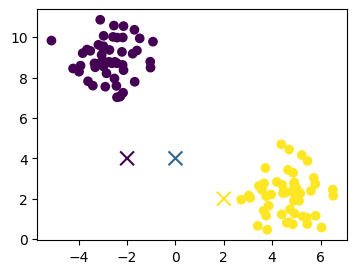

In [6]:
# Nuevos datos aleatorios
X_test = np.array([[-2,4], [2,2],[0,4]])

# Predicciones
y_pred = modelo(X_test)
print(y_pred)

# Visualizar los datos
plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x', s=100)
plt.show()


#